In [76]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 2  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#encoded = Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [77]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [78]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
#decoder = Model(encoded_input, x)

In [79]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [80]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [81]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [82]:
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 3s 46us/step - loss: 0.4547 - val_loss: 0.2776
Epoch 2/25
60000/60000 [==============================] - 3s 49us/step - loss: 0.2745 - val_loss: 0.2715
Epoch 3/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.2707 - val_loss: 0.2692
Epoch 4/25
60000/60000 [==============================] - 5s 77us/step - loss: 0.2688 - val_loss: 0.2677
Epoch 5/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.2676 - val_loss: 0.2668
Epoch 6/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.2668 - val_loss: 0.2662
Epoch 7/25
60000/60000 [==============================] - 5s 85us/step - loss: 0.2662 - val_loss: 0.2656
Epoch 8/25
60000/60000 [==============================] - 5s 79us/step - loss: 0.2657 - val_loss: 0.2653
Epoch 9/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.2652 - val_loss: 0.2648
Epoch

In [83]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

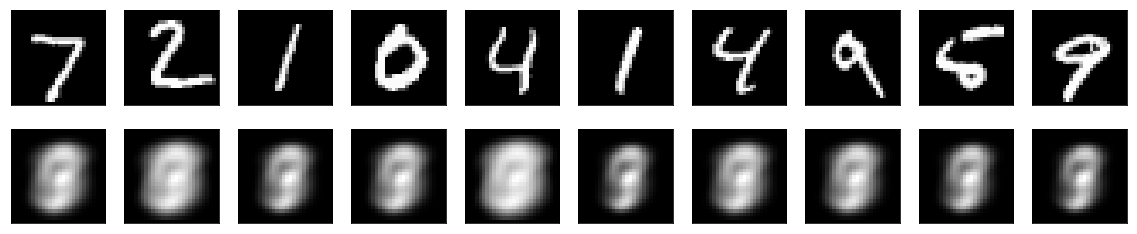

In [84]:
%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [85]:
print encoded_imgs[0].shape

(2,)


In [86]:
y_train[:].shape

(60000,)

In [87]:
x=encoder.predict(x_train)[:,0]#.shape
y=encoder.predict(x_train)[:,1]

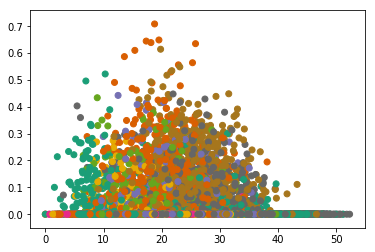

In [88]:
plt.scatter(x,y,c=y_train,cmap='Dark2')

In [45]:
x_train.shape

(60000, 784)

In [46]:
y_train.shape

(60000,)

5


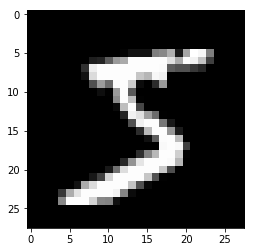

In [28]:
plt.imshow(x_train[0].reshape(28, 28))
print(y_train[0])